# Part 1: **Model**

In [20]:
import math as m
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import numpy as np
import statsmodels.regression.linear_model as sm

In [21]:
# length of manipulators
l1 = l2 = l3 = 130

In [22]:
## Generating dataset for training
def threeLinkManipulatorFile():
    with open('threeLink.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae']
        csv.writer(csvFile).writerow(row)
        for i in range(1, 100000):
            
            q1 = round(random.uniform(0,m.pi),2)
            q2 = round(random.uniform(-m.pi, 0),2)
            q3 = round(random.uniform(-m.pi/2,m.pi/2))
            
            thetae = round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            xe = round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            ye = round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
 
            row = [q1,q2,q3,xe,ye,thetae]
            csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
threeLinkManipulatorFile()

(99999, 6)


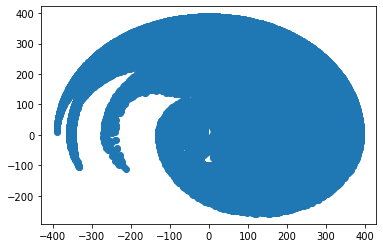

Train on 76499 samples, validate on 8500 samples
Epoch 1/50
76224/76499 [============================>.] - ETA: 0s - loss: 0.2164 - acc: 0.9275

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


76499/76499 [==============================] - 4s 55us/sample - loss: 0.2159 - acc: 0.9276 - val_loss: 0.0673 - val_acc: 0.9366
Epoch 2/50
76499/76499 [==============================] - 4s 53us/sample - loss: 0.0558 - acc: 0.9405 - val_loss: 0.0485 - val_acc: 0.9393
Epoch 3/50
76499/76499 [==============================] - 4s 52us/sample - loss: 0.0446 - acc: 0.9488 - val_loss: 0.0490 - val_acc: 0.9505
Epoch 4/50
76499/76499 [==============================] - 4s 55us/sample - loss: 0.0392 - acc: 0.9547 - val_loss: 0.0339 - val_acc: 0.9613
Epoch 5/50
76499/76499 [==============================] - 4s 55us/sample - loss: 0.0358 - acc: 0.9600 - val_loss: 0.0309 - val_acc: 0.9636
Epoch 6/50
76499/76499 [==============================] - 4s 56us/sample - loss: 0.0329 - acc: 0.9628 - val_loss: 0.0282 - val_acc: 0.9706
Epoch 7/50
76499/76499 [==============================] - 4s 55us/sample - loss: 0.0308 - acc: 0.9648 - val_loss: 0.0271 - val_acc: 0.9709
Epoch 8/50
76499/76499 [==============

In [23]:
## Visualising generated dataset
data=pd.read_csv('threeLink.csv')
print(data.shape)
plt.scatter(data['xe'],data['ye'])
plt.show()

# splitting training and testing dataset
x = data.iloc[:,3:].values
y =data.iloc[:,0:3].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

#model
classifier = Sequential()
classifier.add(Dense(units = 3,input_dim = 3,kernel_initializer = 'uniform'))
#classifier.add(keras.layers.Dropout(0.2))
classifier.add(Dense(units = 100,kernel_initializer = 'uniform',activation = 'relu'))
#classifier.add(keras.layers.Dropout(0.2))
classifier.add(Dense(units = 3,kernel_initializer = 'uniform',activation='linear'))
classifier.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])

#training model
history=classifier.fit(x_train,y_train ,epochs=50, validation_split=0.1, shuffle=True)
classifier.save('threeLink.h5')
#Evaluating model on testing data 
print('Testing the model:\n')
test_loss, test_acc = classifier.evaluate(x_test, y_test)

print('\nTesting Loss = ', test_loss) 
print('Testing Accuracy = ', test_acc)

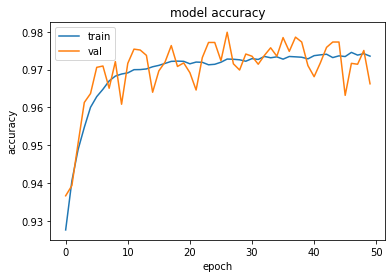

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

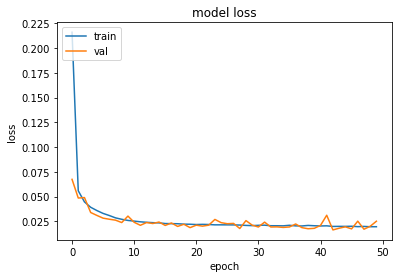

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Part 2: **Plot**

In [26]:
## trying to plot "IIITM"   

def plot_iiitm():
  with open('iiitm_xy-coord.csv', 'r') as coords, open('iiitm-final.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)
        coords_ = csv.reader(coords)
        for line in coords_:
          # print(line[0], line[1])
          i = int(line[0])
          j = int(line[1])
          theta=m.degrees(m.atan(j/i))
          new_x=np.array([[i, j, theta]])
          new_y=classifier.predict(new_x)
          q1=float(new_y[0][0])
          q2=float(new_y[0][1])
          q3=float(new_y[0][2])
          t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
          t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
          t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
          row = [q1,q2,q3,i,j,theta,t1,t2,t3]
          csv.writer(csvFile).writerow(row)
  coords.close()
  csvFile.close()
plot_iiitm()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


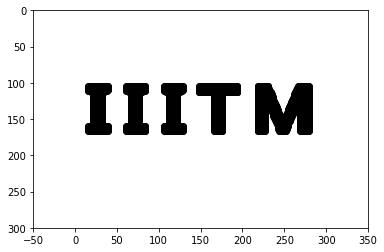

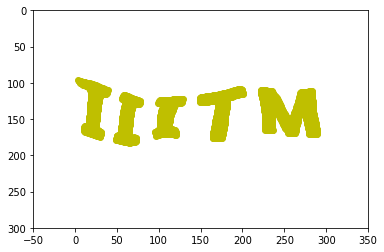

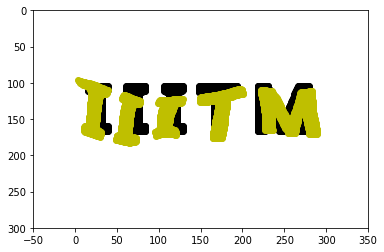

In [27]:
def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    return endx,endy

filename = 'iiitm-final.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)

ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]
 
point = [0,0]
c = 1
images = []
with open('iiitm_xy-coord.csv', 'r') as coords:
      coords_ = csv.reader(coords)
      for line in coords_:
        i = int(line[0])
        j = int(line[1])
        plt.plot(i,j,'ko')
        ax = plt.gca()
        ax.set(xlim=(-50, 350), ylim=(0, 300))
        ax.set_ylim(ax.get_ylim()[::-1])
plt.savefig('original.png')
plt.show()

coords.close()
for i in range(len(data)):
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.plot(point[0],point[1],'yo')
    ax = plt.gca()
    ax.set(xlim=(-50, 350), ylim=(0, 300))
    ax.set_ylim(ax.get_ylim()[::-1])
plt.savefig('calculated.png')
plt.show()
with open('iiitm_xy-coord.csv', 'r') as coords:
      coords_ = csv.reader(coords)
      for line in coords_:
        i = int(line[0])
        j = int(line[1])
        plt.plot(i,j,'ko')
        ax = plt.gca()
        ax.set(xlim=(-50, 350), ylim=(0, 300))
        ax.set_ylim(ax.get_ylim()[::-1])
coords.close()
for i in range(len(data)):
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.plot(point[0],point[1],'yo')
    ax = plt.gca()
    ax.set(xlim=(-50, 350), ylim=(0, 300))
    ax.set_ylim(ax.get_ylim()[::-1])

plt.savefig('original-with-calculated.png')
   